# Kaggle Competitions

## Reference material

The following were reference and assisted in the development of this:

1. https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis
2. https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
3. https://www.kaggle.com/drscarlat/house-prices-all-done-via-pipeline
4.  https://www.kaggle.com/jack89roberts/top-7-using-elasticnet-with-interactions
5. https://www.kaggle.com/laurenstc/top-2-of-leaderboard-advanced-fe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import numpy as np

color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics
def ignore_warn(*args, **kwargs):
    pass
#warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
os.getcwd()


'C:\\Users\\Ed\\python\\kagglehouse'

## Visualize Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


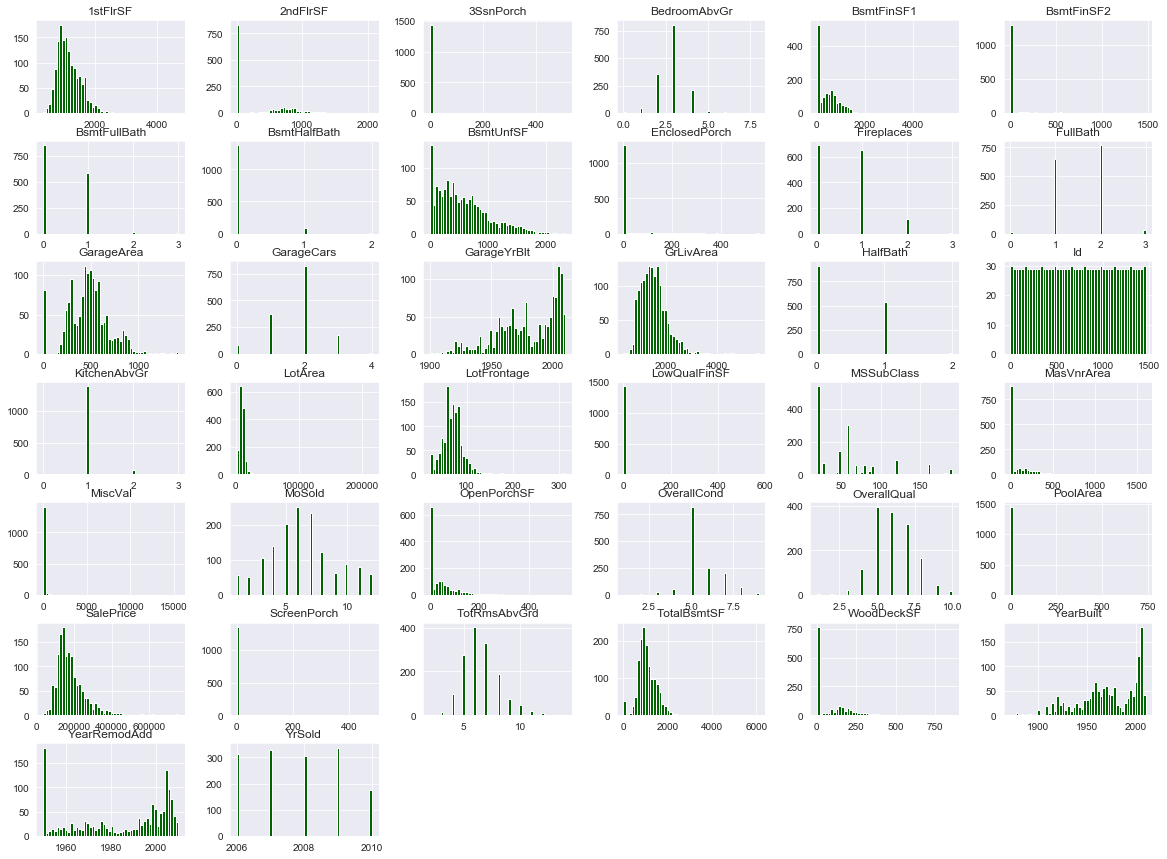

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.hist(bins=50, figsize=(20,15),color='darkgreen')
plt.show()
df_train.head()

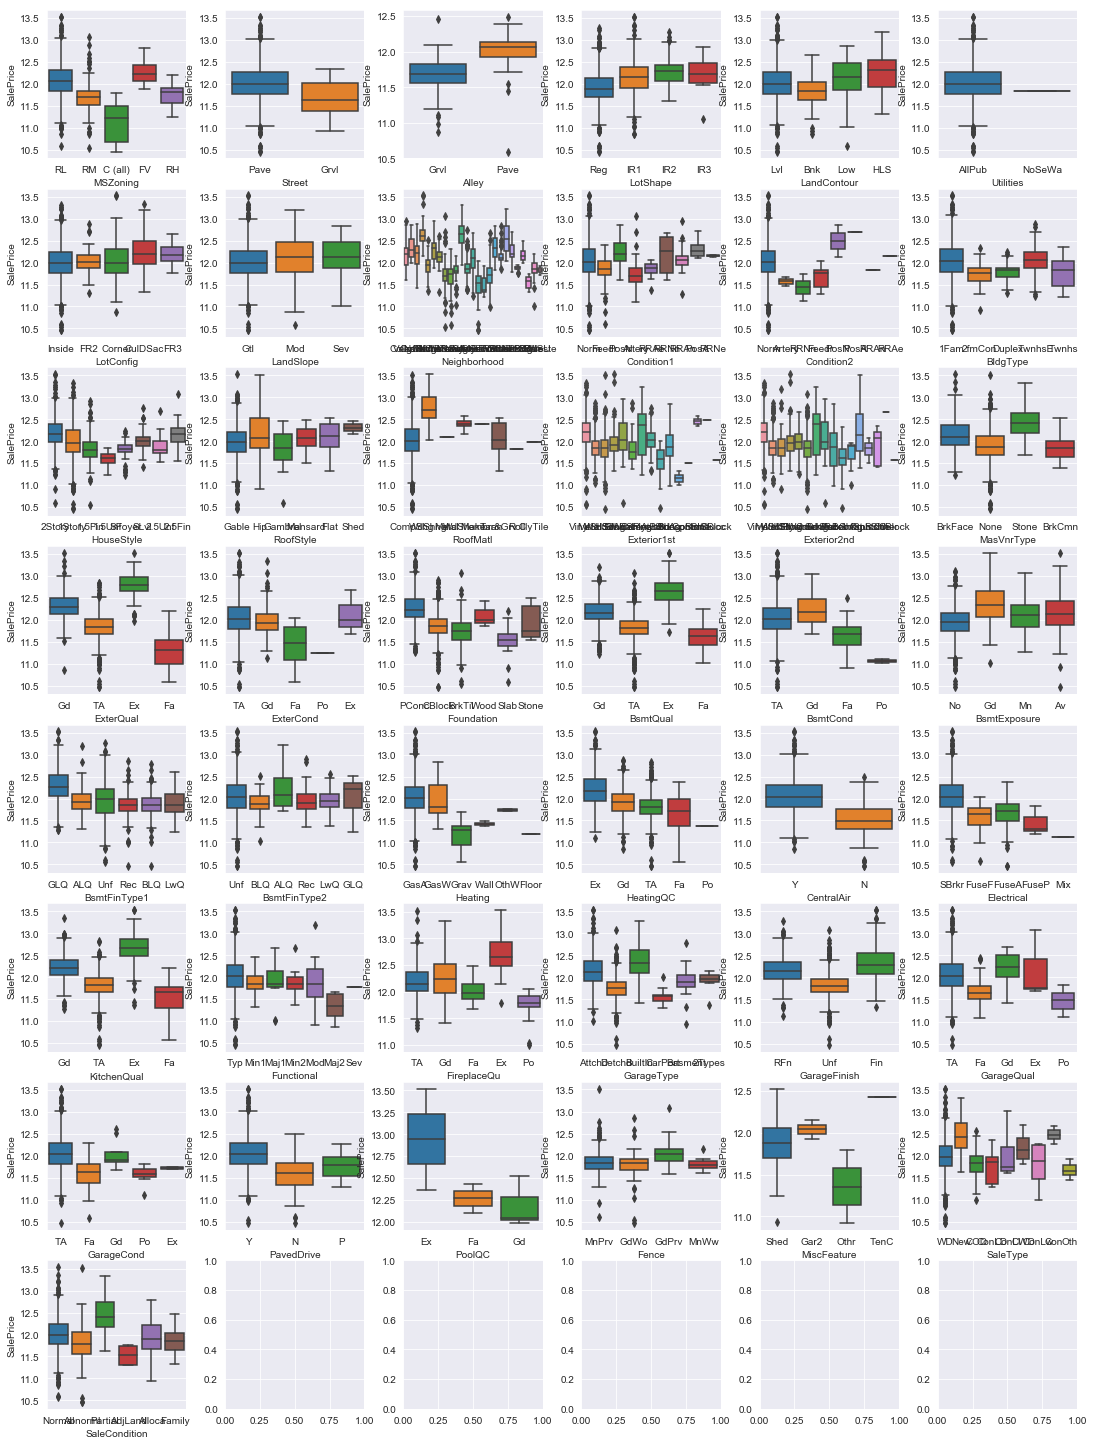

In [4]:
ylog=np.log1p(df_train['SalePrice'])



def boxplotall(df,ylog, *args, **kwargs):
    df_train1=df
    #df_train1['logSalePrice']=np.log1p(df['SalePrice'])
    categorical_features = df_train1.select_dtypes(include=[np.object])
    le=len(categorical_features.columns) 
    fig, axes = plt.subplots(le // 6 +1, 6,figsize=(15,20))
    fig.tight_layout()
    for i,col in enumerate(categorical_features.columns):
        ax=axes.flat[i]
        sns.boxplot(x=col,y=ylog,ax=ax,data=df_train1)
        #sns.swarmplot(x=col,y='SalePrice1',ax=ax,data=df_train1)
        #df_train1.boxplot(ax=ax,column="SalePrice1",by=col)
        #ax.set_title(col)

    plt.show()

def regplotall(df,ylog, *args, **kwargs):
    df_train1=df  
    numeric_features = df_train1.select_dtypes(include=[np.number])
    le=len(numeric_features.columns) 
    fig, axes = plt.subplots(le // 6 +1, 6,figsize=(15,20))
    fig.tight_layout()
    for i,col in enumerate(numeric_features.columns):
        ax=axes.flat[i]
        sns.regplot(x=col,y=ylog,ax=ax,data=df_train1, *args, **kwargs)
        #sns.swarmplot(x=col,y='SalePrice1',ax=ax,data=df_train1)
        #df_train1.boxplot(ax=ax,column="SalePrice1",by=col)
        #ax.set_title(col)
    plt.show()

    
def visualizeall(df):
    boxplotall(df)
    regplotall(df)
#visualizeall(df_train)
boxplotall(df_train,ylog)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

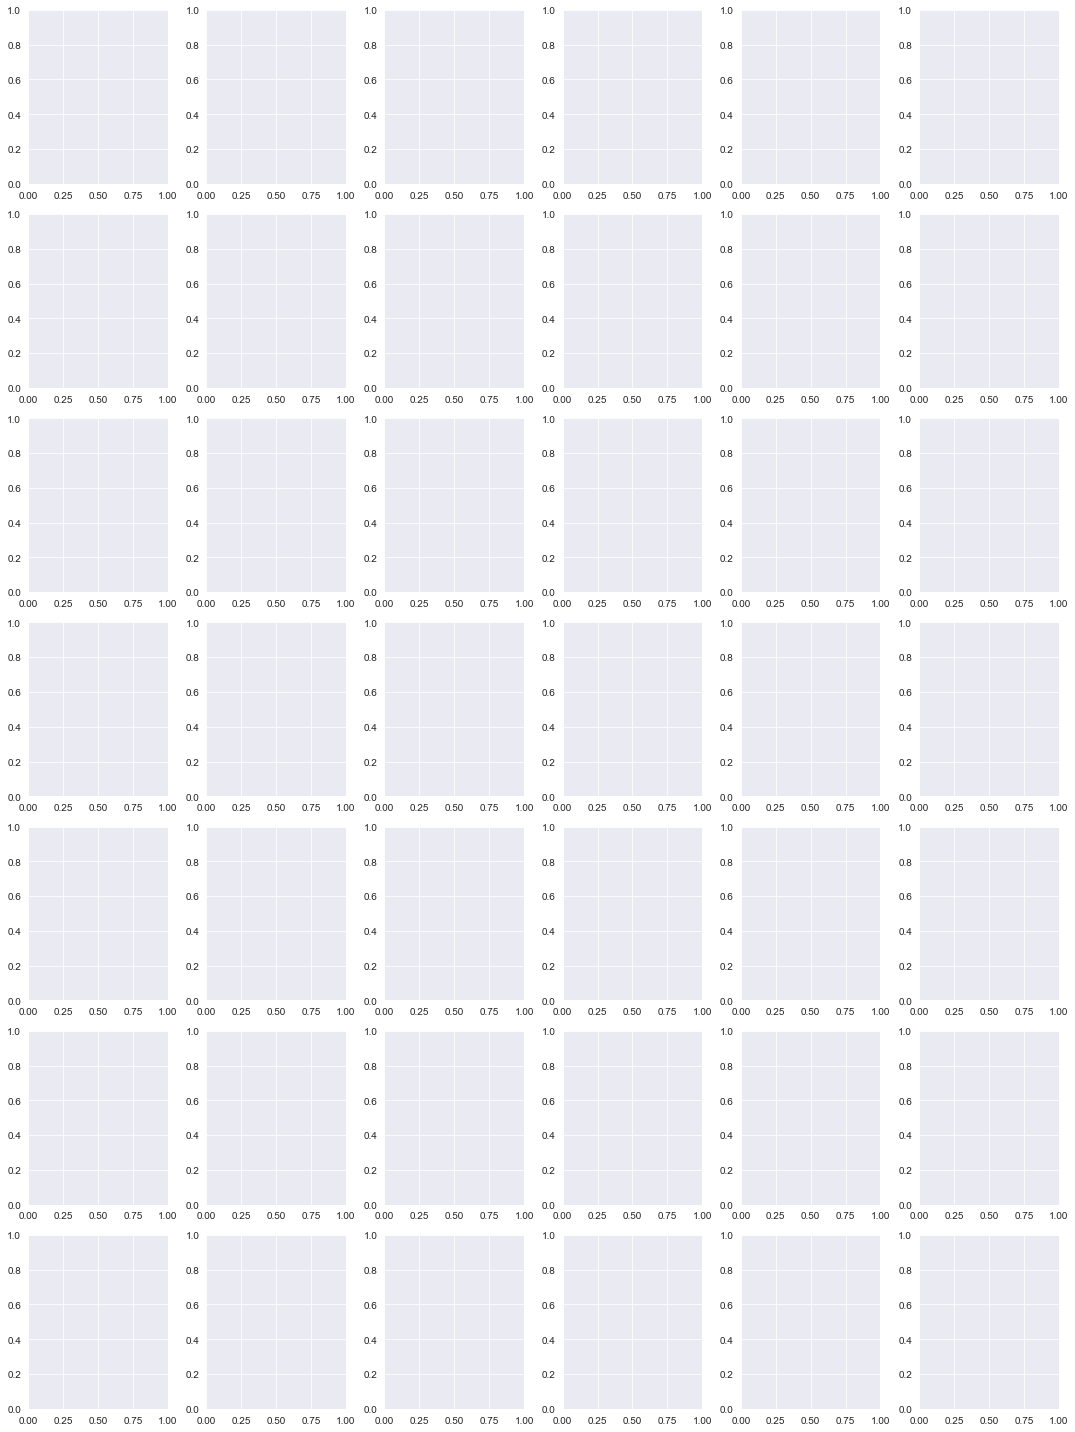

In [57]:
#warnings.warn = ignore_warn 
#df_train=df_train.drop([1298])
regplotall(df_train,ylog)


In [6]:
cols1=df_train.columns.values.tolist()
cols2=df_test.columns.values.tolist()
cols3=cols1+cols2

numeric_features = df_train.select_dtypes(include=[np.number])
categorical_features = df_train.select_dtypes(include=[np.object])
#numeric_features.columns

In [7]:
un=[]
for i in cols3:
    if cols3.count(i)==1:
        un.append(i)
print (df_train.columns)
un

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

['SalePrice']

In [8]:
train_id=df_train['Id']
test_id=df_test['Id']

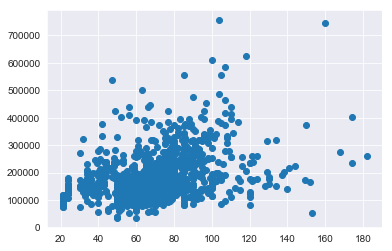

In [9]:
# Remove 2 apparent outliers

fig, ax=plt.subplots()
df_train1 = df_train.drop(df_train[(df_train['LotFrontage']>300) & (df_train['SalePrice']<300000)].index)
ax.scatter(x=df_train1['LotFrontage'],y=df_train1['SalePrice'])
plt.show()

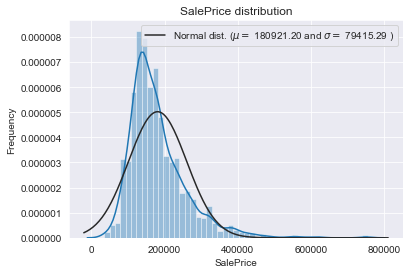

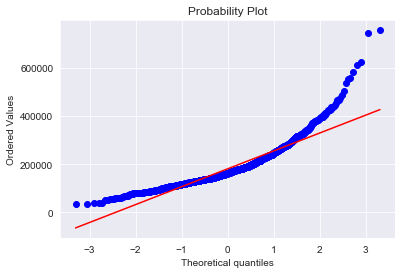

In [10]:
sns.distplot(df_train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_train['SalePrice'])
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



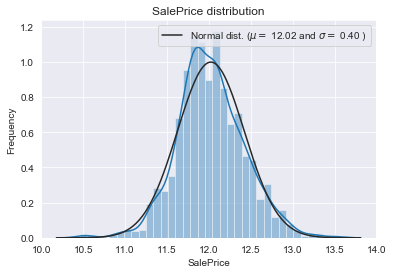

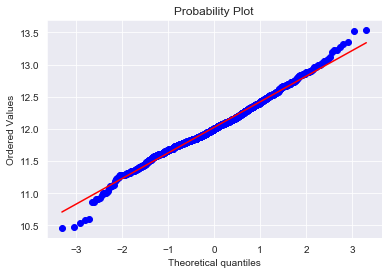

In [11]:
#Transform
df_train1=df_train
df_train1['SalePrice']=np.log1p(df_train['SalePrice'])
sns.distplot(df_train1['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train1['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## Concatenate
Concatenate and perform column datat ajustment

In [12]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train1.SalePrice.values
all_data = pd.concat((df_train1, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


E:\EdsProgramming\Anaconda3\envs\kaggle\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



# Correlated Variables

['OverallQual', 'GarageArea', 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd']
['SalePrice', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']


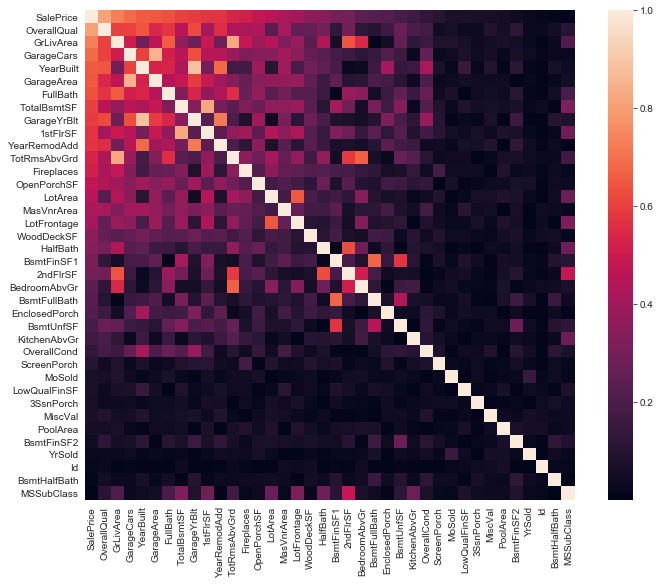

In [13]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr(method='spearman').abs()
corrmat = corrmat.sort_values('SalePrice',axis=0,ascending=False).sort_values('SalePrice',axis=1,ascending=False)
#corrmat["SalePrice"].sort_values(ascending=False)
plt.subplots(figsize=(12,9))
#sns.heatmap(corrmat, vmax=0.9, vmin=-.9,square=True,cmap="RdBu_r")
sns.heatmap(corrmat,square=True)  # if using absolute
# Select upper triangle of correlation matrix
upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.8)]
to_drop=[]
cor_col=[]
for column in upper.columns:
    if any(upper[column].abs() > 0.8):
        to_drop.append(column)
        corcol=upper.index[upper[column].abs()>.8]
        cor_col.append(corcol.values[0])
print(to_drop)
print(cor_col)
#df.drop(df.columns[to_drop], axis=1)  # Drop if highenought
plt.show()

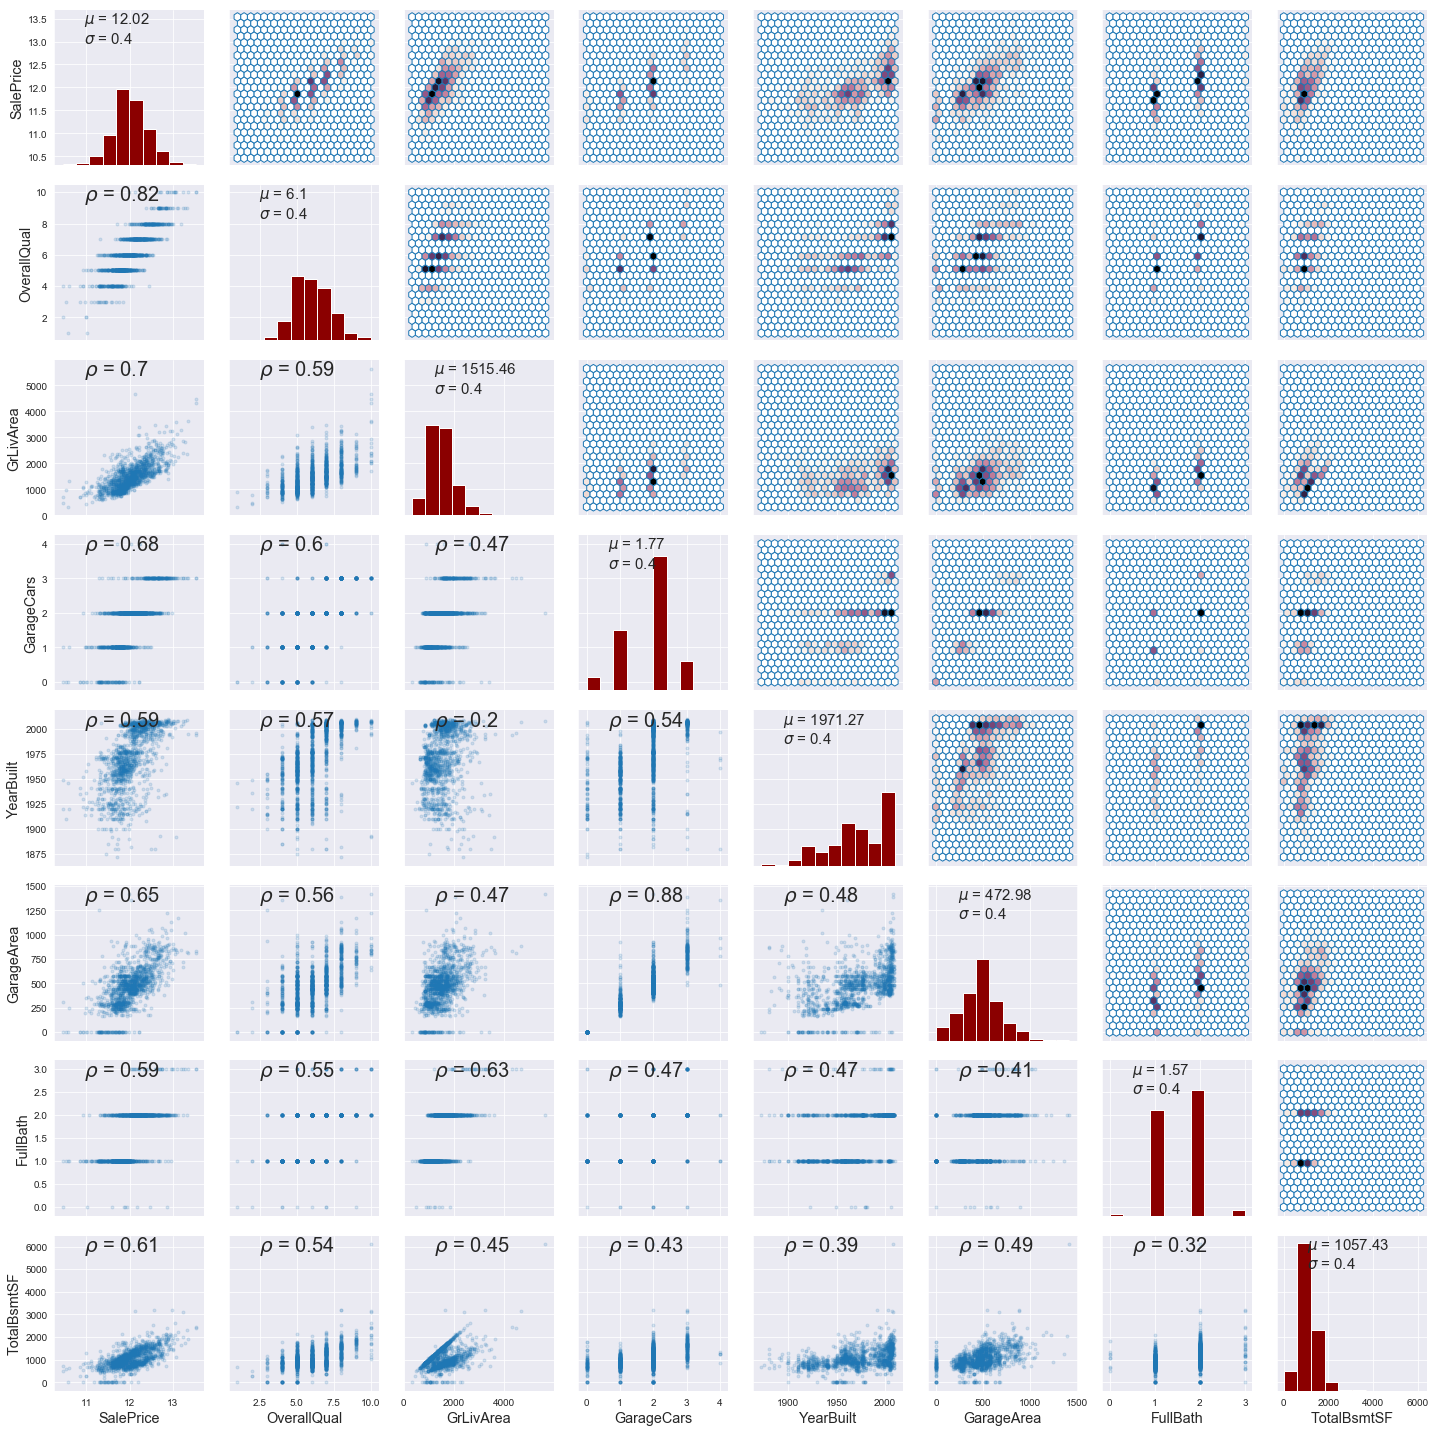

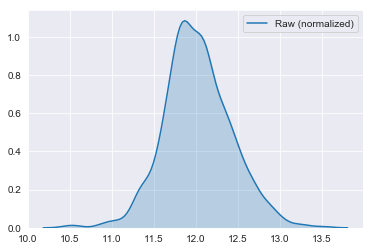

In [14]:
#corr_matrix["SalePrice"].sort_values(ascending=False)

corcols=corrmat["SalePrice"].sort_values(ascending=False).head(8).index

cpcols=df_train.columns[:20]
df_cp=df_train1[corcols]

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)


def core(df, α=0.05):  #  Just plots the quantiles
    if  (α==0):
        return df
    else:
        mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
        return df[mask]

def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.9), size = 20, xycoords = ax.transAxes)
def statsdisp(x, **kwargs):
    # Calculate the value
    mu = np.mean(x)
    signma= np.std(x)
    # Make the label
    label = r'$\mu$ = ' + str(round(mu, 2)) + '\n'+ r'$\sigma$ = ' + str(round(sigma, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.8), size = 15, xycoords = ax.transAxes)

def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out   
    
    
plt.rcParams["axes.labelsize"]='x-large'
(df_cp.select_dtypes(include=[np.number])
    .pipe(core,α=0)
    .pipe(sns.PairGrid)
    .map_lower(plt.scatter, marker='.', alpha=.15)
    .map_lower(corr)
    .map_diag(plt.hist,color='darkred')
    .map_diag(statsdisp)
#    .map_diag(stats.probplot)
#   .map_upper(sns.kdeplot)
    .map_upper(plt.hexbin, cmap=cmap, gridsize=20)
);
plt.show()
sns.kdeplot(df_cp['SalePrice'], shade=True, label="Raw (normalized)" );
plt.show()

# Transforming Data

In [15]:
#features[features['PoolArea'] > 0 & features['PoolQC'].isnull()]

## Remove unneeded varaibles

In [16]:
#Utilities has information that is not Used
all_data=all_data.drop(['Utilities'],axis=1)

## Evaluate Missing Data

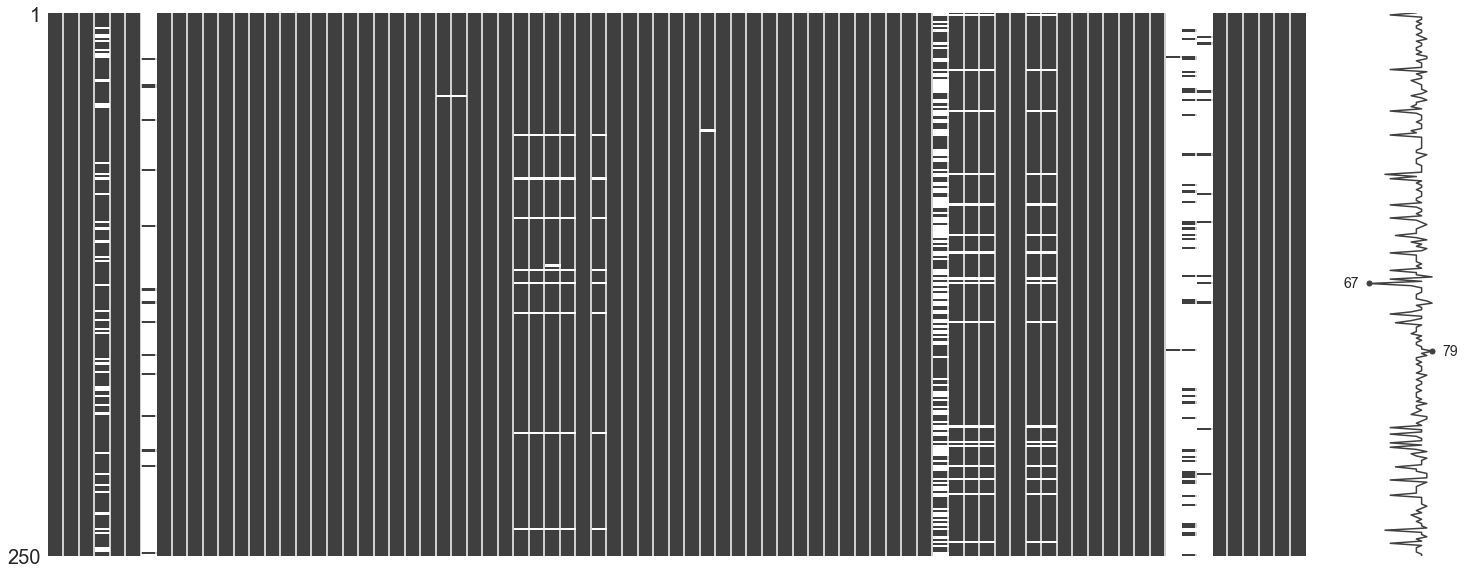

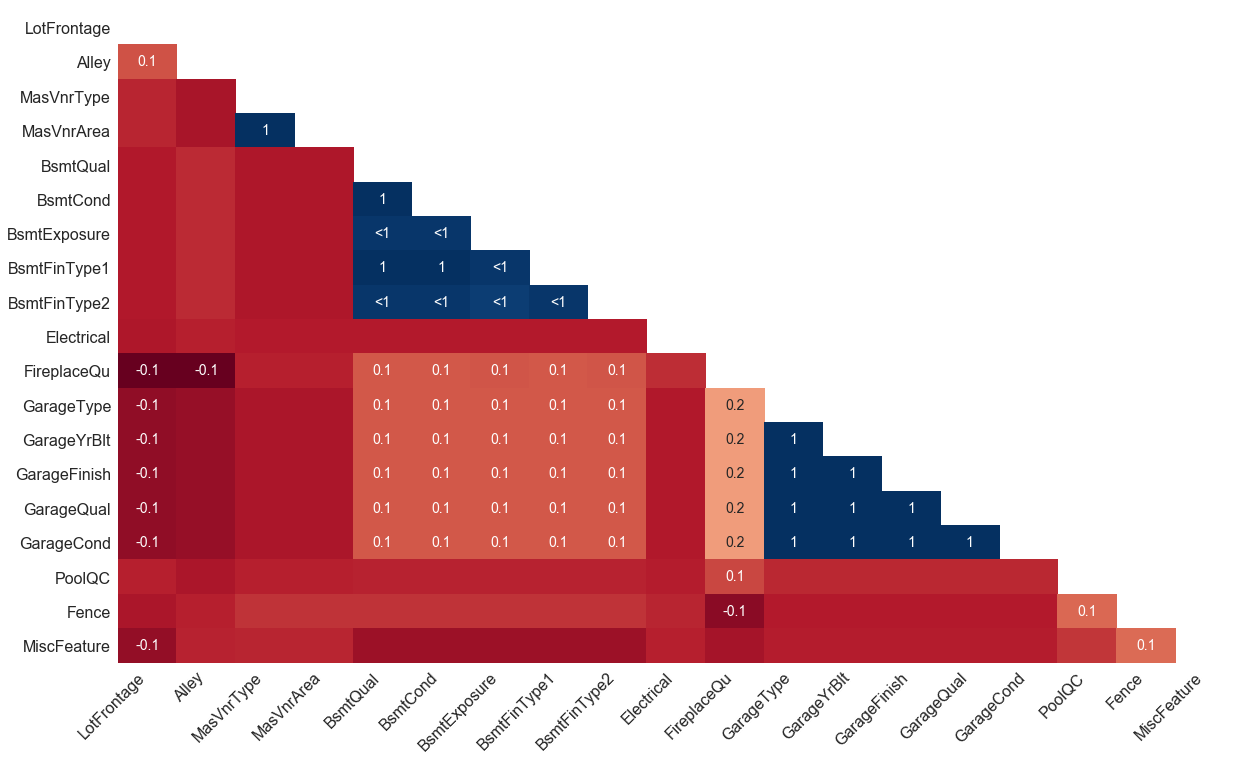

(30, 1)


In [17]:
import missingno as msno  # Nice but require matplotlib rollback
msno.matrix(df_train.sample(250))
msno.heatmap(df_train)
plt.show()
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(missing_data.shape)


Text(0.5,1,'Percent missing data by feature')

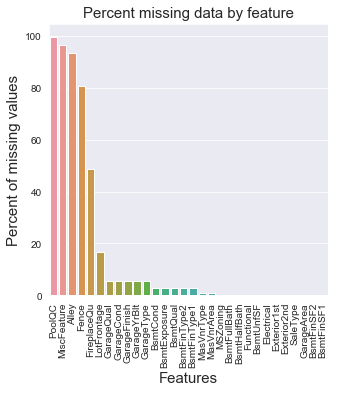

In [18]:
f, ax = plt.subplots(figsize=(5, 5))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Fill Data for nones

In [19]:
#Replace by None - Based on Description
cols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish']
bcols=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
gcols=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
mcols=['MasVnrType','MSSubClass']
for col in cols+bcols+gcols+mcols:
    all_data[col]=all_data[col].fillna('None')
    
#Replace by 0 - Based on Descriptions
b0cols=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
g0cols=['GarageYrBlt', 'GarageArea', 'GarageCars']
m0cols=['MasVnrArea']
for col in b0cols+g0cols+m0cols:
    all_data[col]=all_data[col].fillna(0)

#Replace by Mode since high frequency
mmcols=['Functional','SaleType', 'KitchenQual','Exterior2nd','Exterior1st','Electrical','MSZoning']
for col in mmcols:
    all_data[col]=all_data[col].fillna(all_data[col].mode()[0])

#Replace by Median in Neiborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Knn is good in general but should be used with normalized data
#knn_impute(target=df['Age'], attributes=df.drop(['Age', 'PassengerId'], 1),
#                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
#                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)

#all_data=all_data.drop(['Utilities'],axis=1)

## Check for remaining NA's

In [20]:
import math
#all_data=all_data.drop('Utilities')
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
all_data_na_cols=all_data_na.index.tolist()

dl=[]
for col in all_data_na_cols:
    m=all_data[col].mode().iloc[0]
    mia=all_data_na[col]
    vc=math.trunc(all_data[col].value_counts().iloc[0]/len(all_data)*100)
    dl.append((col,mia,m,vc))
missing_data=pd.DataFrame(dl,columns=['Column','Missing Ratio','Mode','Percent'])
print("Shape :",missing_data.shape)

#mode_data
missing_data['Column'].tolist()
missing_data

Shape : (0, 4)


,Column,Missing Ratio,Mode,Percent


## Converting Year Date into Datetime

df = df_train[['YrSold','MoSold','SalePrice']]
df=df.astype(str)
df['Date']=pd.to_datetime(df['YrSold']+df['MoSold']+df['MoSold'],format="%Y%m%d")
df.set_index('Date',inplace=True)
df=df.drop(columns=['YrSold','MoSold'])
df=df.sort_index()
df['SalePrice']=df['SalePrice'].astype(float)
df['LogSalePrice']=np.log1p(df['SalePrice'])
df.plot()
filt=df.groupby(df.index).mean()
filt.plot()
df.head()

df['SalePrice']

In [21]:
#pd.pandas.to_datetime(all_data['YrSold'])

## labele Encoding Categorical Values

In [22]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
all_data_trans=all_data.copy()
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data_trans[c] = lbl.transform(list(all_data[c].values))

# shape        
#print('Shape all_data: {}'.format(all_data_trns.shape))

## Adding Features

In [23]:
# Adding total sqfootage feature 
all_data_trans['TotalSF'] = all_data_trans['TotalBsmtSF'] + all_data_trans['1stFlrSF'] + all_data_trans['2ndFlrSF']
all_data_trans['TotalSF'] = all_data_trans['TotalBsmtSF'] + all_data_trans['1stFlrSF'] + all_data_trans['2ndFlrSF']

In [24]:
#all_data_trans_trans.info()

# Dealing with Skew in the data

In [25]:
#MSSubClass=The building class
all_data_trans['MSSubClass'] = all_data_trans['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
all_data_trans['OverallCond'] = all_data_trans['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
all_data_trans['YrSold'] = all_data_trans['YrSold'].astype(str)
all_data_trans['MoSold'] = all_data_trans['MoSold'].astype(str)

## Viewing data to determine skewnewss

E:\EdsProgramming\Anaconda3\envs\kaggle\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
E:\EdsProgramming\Anaconda3\envs\kaggle\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\EdsProgramming\Anaconda3\envs\kaggle\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


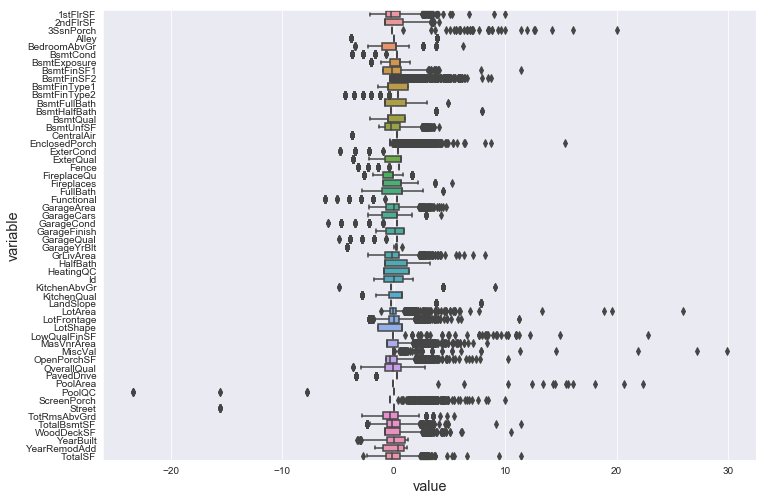

,variable,value
0,1stFlrSF,-0.773861
1,1stFlrSF,0.261075
2,1stFlrSF,-0.610718
3,1stFlrSF,-0.506205
4,1stFlrSF,-0.037170


In [26]:
#vp.drop('PoolArea',inplace=True)
from sklearn import preprocessing

numeric_feats = all_data_trans.dtypes[all_data_trans.dtypes != "object"].index
pp=all_data_trans[numeric_feats]
pp[numeric_feats] = preprocessing.scale(pp[numeric_feats])
vp=pp.melt()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
#ax=sns.violinplot(data=vp,x='value',y='variable')
ax=sns.boxplot(data=vp,x='value',y='variable')
plt.show()
#fig, ax = plt.subplots(figsize=a4_dims)
#ax=sns.violinplot(data=vp,x='value',y='variable')
#ax=sns.boxplot(data=vp,x='value',y='variable')
plt.show()
vp.head()

In [27]:
numeric_feats = all_data_trans.dtypes[all_data_trans.dtypes != "object"].index
all_data_trans.dtypes.value_counts()
# Check the skew of all numerical features
skewed_feats = all_data_trans[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


There are 56 skewed numerical features to Box Cox transform


E:\EdsProgramming\Anaconda3\envs\kaggle\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


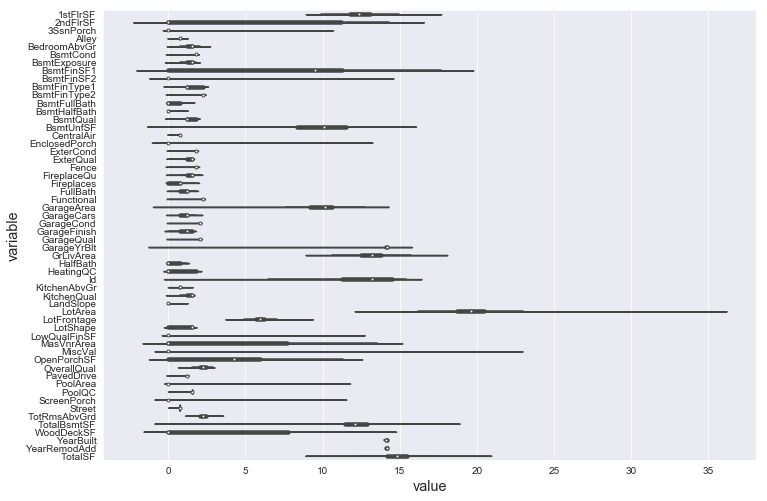

In [28]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data_trans[feat] = boxcox1p(all_data_trans[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])
vp=all_data_trans[numeric_feats].melt()
fig, ax = plt.subplots(figsize=a4_dims)
ax= sns.violinplot(data=vp,x='value',y='variable')
plt.show()





## Checking Box-Cox transformations

In [29]:
def plotboxcoxall(df):
    cols_continuous=numeric_features

    #Check effect of Box-Cox transforms on distributions of continuous variables
    fcols = 6
    frows = len(cols_continuous)-1
    plt.figure(figsize=(4*fcols,4*frows))
    i=0
    for var in cols_continuous:
        if var!='SalePrice':
            dat = df[[var, 'SalePrice']].dropna()

            i+=1
            plt.subplot(frows,fcols,i)
            sns.distplot(dat[var] , fit=stats.norm);
            plt.title(var+' Original')
            plt.xlabel('')

            i+=1
            plt.subplot(frows,fcols,i)
            _=stats.probplot(dat[var], plot=plt)
            plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
            plt.xlabel('')
            plt.ylabel('')

            i+=1
            plt.subplot(frows,fcols,i)
            plt.plot(dat[var], dat['SalePrice'],'.',alpha=0.5)
            plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['SalePrice'])[0][1]))

            i+=1
            plt.subplot(frows,fcols,i)
            trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
            trans_var = scale_minmax(trans_var)      
            sns.distplot(trans_var , fit=stats.norm);
            plt.title(var+' Tramsformed')
            plt.xlabel('')

            i+=1
            plt.subplot(frows,fcols,i)
            _=stats.probplot(trans_var, plot=plt)
            plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
            plt.xlabel('')
            plt.ylabel('')

            i+=1
            plt.subplot(frows,fcols,i)
            plt.plot(trans_var, dat['SalePrice'],'.',alpha=0.5)
            plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['SalePrice'])[0][1]))

### Determing Correct lambda value

    Test name          Statistic      p-value
------------------ ------------------ -------
D’Agostino-Pearson 5940.5393120662375     0.0
       Jarque-Bera 10948394.193805482     0.0
lambda = 3.6045
    Test name           Statistic           p-value      
------------------ ------------------- ------------------
D’Agostino-Pearson 0.19040013873192363 0.9091910150006726
       Jarque-Bera 0.07939676893482346 0.9610792718775469


E:\EdsProgramming\Anaconda3\envs\kaggle\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


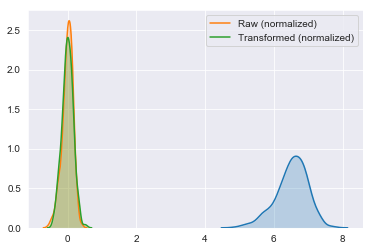

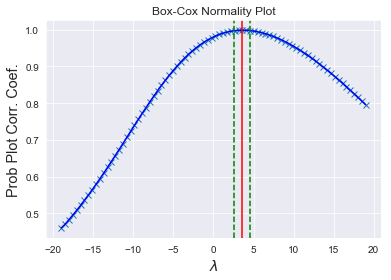

In [30]:
from astropy.table import Table
np.random.seed(1144) 
x = stats.loggamma.rvs(5, size=500) + 5
xt, maxlog, interval = stats.boxcox(x, alpha=0.05)
sns.kdeplot(x, shade=True);
 
def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [('D’Agostino-Pearson', nm_value, nm_p),
                 ('Jarque-Bera', jb_value, jb_p)]
    t = Table(rows=data_rows, names=('Test name', 'Statistic', 'p-value'), 
              meta={'name': 'normal test table'},
          dtype=('S25', 'f8', 'f8'))
    print(t)

normtesttab(all_data['PoolArea'])

xt, maxlog, interval = stats.boxcox(x, alpha=0.05)
print("lambda = {:g}".format(maxlog))

normtesttab(xt)

x1=x.reshape(500)
x1=(x1 - x1.mean()) / (x1.max() - x1.min())
 
xt1=xt.reshape(500)
xt1=(xt1 - xt1.mean()) / (xt1.max() - xt1.min())
 
sns.kdeplot(x1, shade=True, label="Raw (normalized)" );
sns.kdeplot(xt1, shade=True, label="Transformed (normalized)" );

fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, -19, 19, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

# Preparing all data

In [31]:
all_data_trans = pd.get_dummies(all_data_trans)
print(all_data_trans.shape)
train = all_data_trans[:ntrain]
test = all_data_trans[ntrain:]

(2919, 260)


## get training data
X, y = get_training_data()

## find and remove outliers using a Ridge model
outliers = find_outliers(Ridge(), X, y)

## permanently remove these outliers from the data
df_model = df_model.drop(outliers)
id_train = id_train.drop(outliers)

In [32]:
df_train.shape

(1460, 81)

#  Analysis

## Useful Functions

In [33]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1-np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1-np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [34]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

## Initial Model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


#Build our model method
lm = LinearRegression()

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


#second scoring metric
def cv_rmsle(model):
    rmsle = np.sqrt(np.log(-cross_val_score(model, X, y,
                                           scoring = 'neg_mean_squared_error',
                                           cv=kfolds)))
    return(rmsle)

## Base models

In [36]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
#mods={'lasso':lasso,'Enet':ENet,'KRR':KRR,'Gboost':GBoost,'XGB':model_xgb,'LGB':model_lgb}
mods={'lasso':lasso,'Enet':ENet,'KRR':KRR}

for name,mod in mods.items():
    score = rmsle_cv(mod)
    print("\n"+name+" score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


lasso score: 0.1247 (0.0160)


Enet score: 0.1246 (0.0161)


KRR score: 0.1280 (0.0112)



In [37]:
#benchmark_model = make_pipeline(RobustScaler(),
#                                lm).fit(X=X, y=y)
#cv_rmse(benchmark_model).mean()
1

1

# Viewing Fit

# Dropping Outliers

In [38]:
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)

# scorer to be used in sklearn model fitting
#rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [39]:
# function to detect outliers based on the predictions of a model
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print('rmse=',rmse(y, y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers    

In [40]:
# function to get training samples
def get_training_data():
    # extract training samples
    df_train = df_model.loc[id_train]
    
    # split SalePrice and features
    y = df_train.SalePrice
    X = df_train.drop('SalePrice',axis=1)
    
    return X, y

# extract test data (without SalePrice)
def get_test_data():
    return df_model.loc[id_test].drop('SalePrice',axis=1)

R2= 0.9296335713132383
rmse= 0.10592430139823922
---------------------------------------
mean of residuals: -2.3104805739870382e-15
std of residuals: 0.10596059548921287
---------------------------------------
22 outliers:
[30, 185, 410, 462, 495, 523, 560, 588, 628, 632, 666, 681, 688, 803, 812, 968, 970, 1182, 1298, 1324, 1432, 1453]


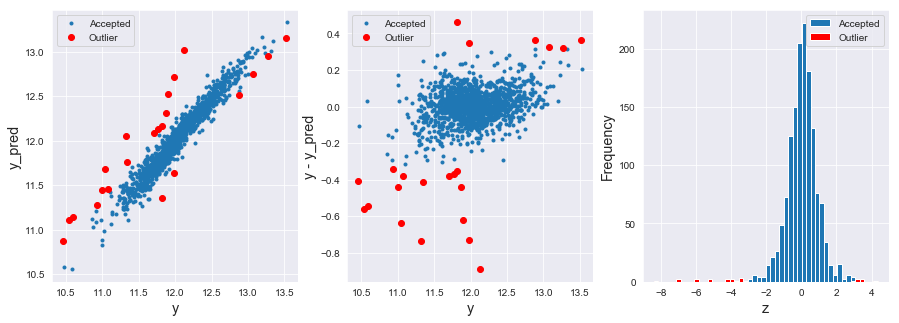

In [41]:
# get training data


# find and remove outliers using a Ridge model
outliers = find_outliers(lasso, train, ylog)

# permanently remove these outliers from the data
#df_model = df_model.drop(outliers)
#id_train = id_train.drop(outliers)

In [42]:
pd.set_option('max_columns', None)
train.loc[outliers]


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,OverallQual,PavedDrive,PoolArea,PoolQC,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,TotalSF,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSSubClass_0,MSSubClass_1,MSSubClass_10,MSSubClass_11,MSSubClass_12,MSSubClass_13,MSSubClass_14,MSSubClass_15,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,MSSubClass_9,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_0,MoSold_1,MoSold_10,MoSold_11,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OverallCond_0,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,YrSold_0,YrSold_1,YrSold_2,YrSold_3,YrSold_4
30,10.946837,11.023123,0.0,1.194318,1.540963,1.820334,1.54

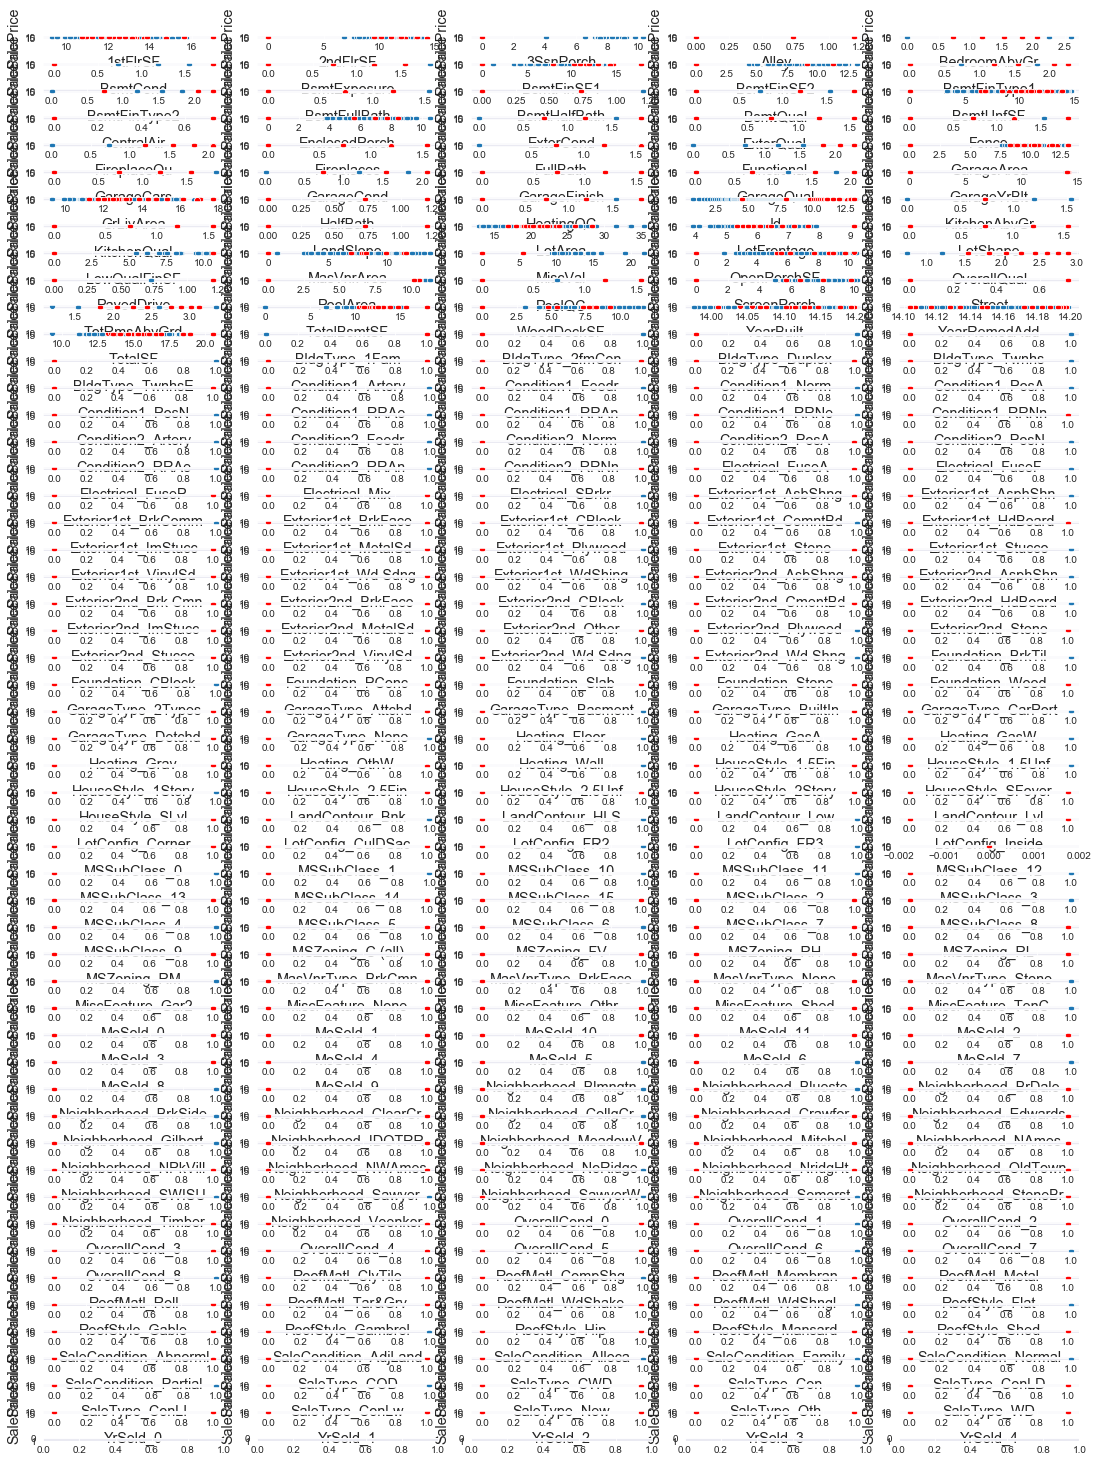

In [43]:
numeric_features = train.select_dtypes(include=[np.number])
le=len(numeric_features.columns) 
fig, axes = plt.subplots(le // 5 +1, 5,figsize=(15,20))
fig.tight_layout()
for i,col in enumerate(numeric_features.columns):
    ax=axes.flat[i]
    sns.scatterplot(x=col,y=ylog,ax=ax,data=train)
    sns.scatterplot(x=col,y=ylog,ax=ax,data=train.loc[outliers], color='red')
    #sns.swarmplot(x=col,y='SalePrice1',ax=ax,data=df_train1)
    #df_train1.boxplot(ax=ax,column="SalePrice1",by=col)
    #ax.set_title(col)
plt.show()



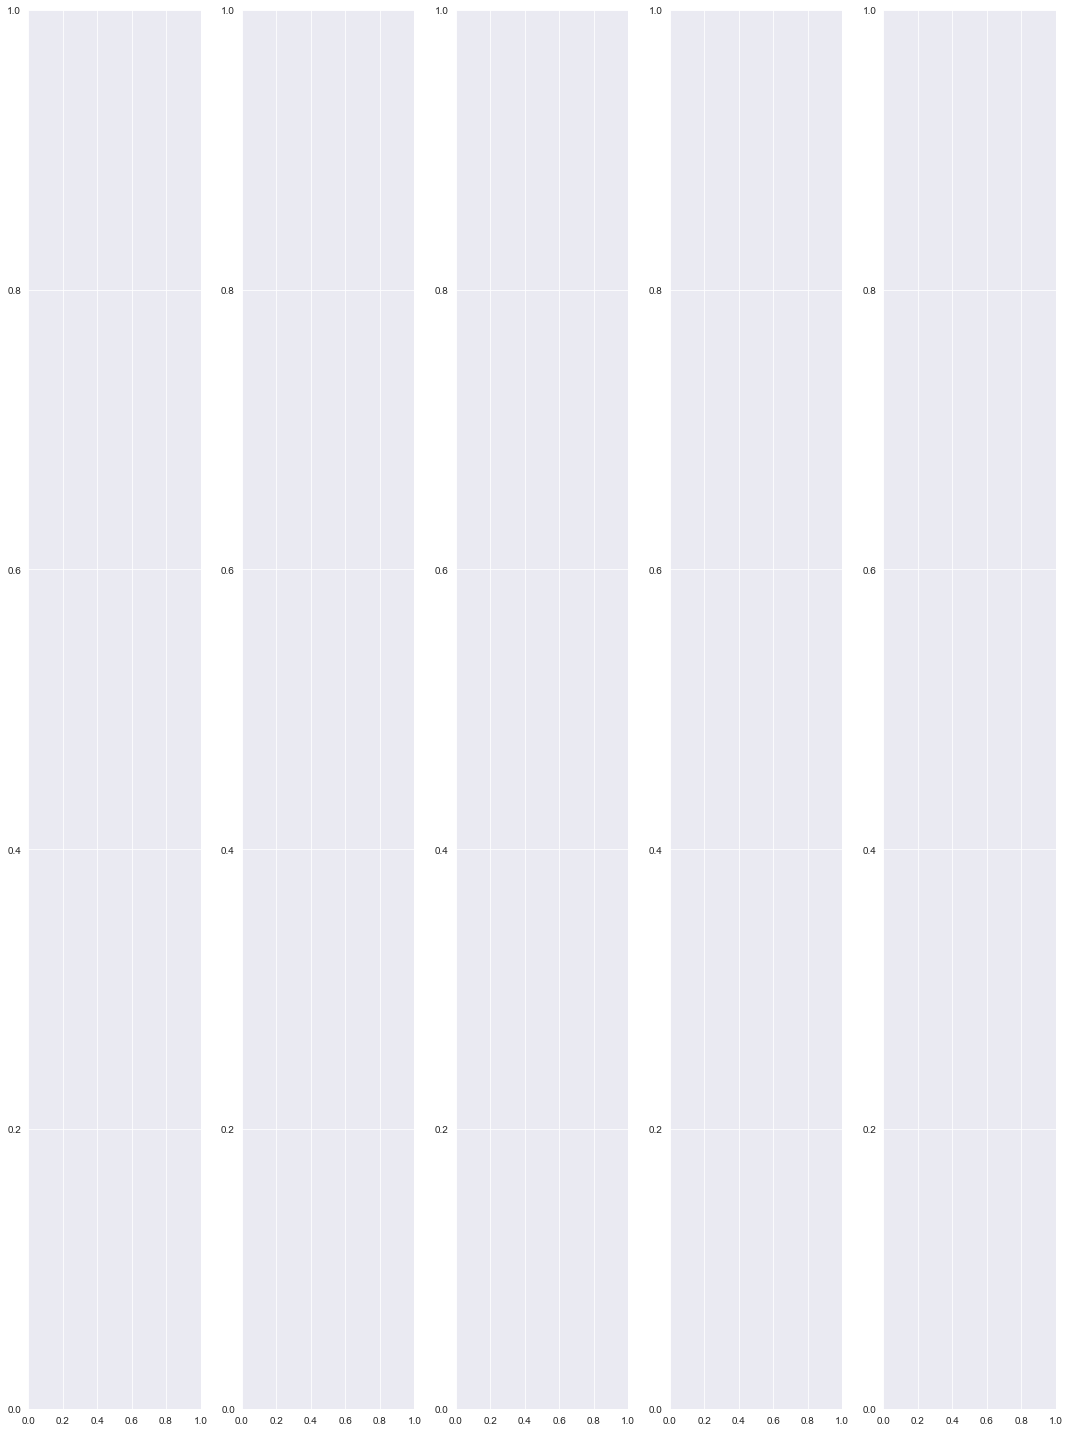

In [44]:
categorical_features = train.select_dtypes(include=[np.object])
le=len(categorical_features.columns) 
fig, axes = plt.subplots(le // 5 +1, 5,figsize=(15,20))
fig.tight_layout()
for i,col in enumerate(categorical_features.columns):
    ax=axes.flat[i]
    sns.boxplot(x=col,y=ylog,ax=ax,data=train)
    sns.swarmplot(x=col,y=ylog,ax=ax,data=train,color='red')
plt.show()

## Averaging Models

In [45]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

#  Reference Material

1.  Python datamaninpuation reference (https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)
2.  (https://tomaugspurger.github.io/modern-7-timeseries)
3. Cheat cheat (https://www.analyticsvidhya.com/blog/2016/12/cheatsheet-scikit-learn-caret-package-for-python-r-respectively/)